In [8]:
#Load the dataset and print first values
import pandas as pd
file_path = 'C:/Users/civin/datasetkdd.csv'
data= pd.read_csv(file_path)
print(data.head())

   duration protocol_type   service flag  src_bytes  dst_bytes  land  \
0       0.0           tcp  ftp_data   SF      491.0        0.0     0   
1       0.0           udp     other   SF      146.0        0.0     0   
2       0.0           tcp   private   S0        0.0        0.0     0   
3       0.0           tcp      http   SF      232.0     8153.0     0   
4       0.0           tcp      http   SF      199.0      420.0     0   

   wrong_fragment  urgent  hot  ...  dst_host_srv_count  \
0             0.0     0.0  0.0  ...                25.0   
1             0.0     0.0  0.0  ...                 1.0   
2             0.0     0.0  0.0  ...                26.0   
3             0.0     0.0  0.0  ...               255.0   
4             0.0     0.0  0.0  ...               255.0   

   dst_host_same_srv_rate  dst_host_diff_srv_rate  \
0                    0.17                    0.03   
1                    0.00                    0.60   
2                    0.10                    0.05   


In [18]:
#missing values
print("\nMissing values:")
print(data.isnull().sum())
data=data.dropna() #drop values


Missing values:
duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate             

In [40]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Assume the target column is named 'class' with 'normal' or 'anomaly'  
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(data['class'])
#split again
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [68]:
#perceptron model
from sklearn.linear_model import Perceptron
perceptron = Perceptron(max_iter=1000, eta0=1.0, penalty=None, random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(random_state=42)

In [69]:
perceptron = Perceptron(max_iter=1500, eta0=0.1, penalty='l2', random_state=42)
perceptron.fit(X_train, y_train)

Perceptron(eta0=0.1, max_iter=1500, penalty='l2', random_state=42)

In [45]:
y_pred = perceptron.predict(X_test)

              precision    recall  f1-score   support

           0       0.85      0.95      0.90     14254
           1       0.95      0.85      0.90     15450

    accuracy                           0.90     29704
   macro avg       0.90      0.90      0.90     29704
weighted avg       0.90      0.90      0.90     29704



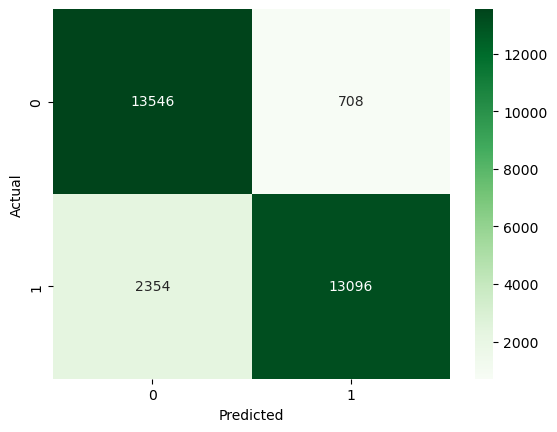

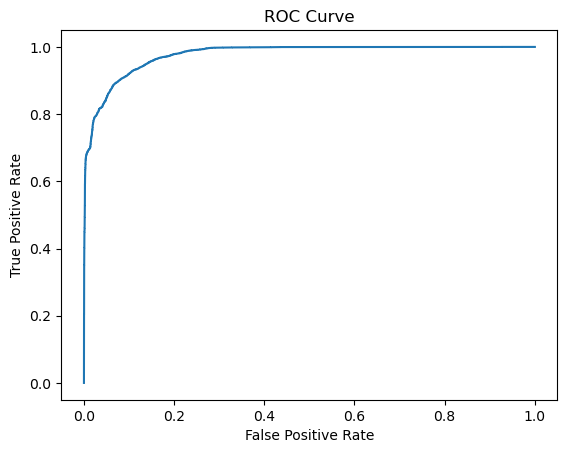

AUC Score: 0.9766340067830842


In [64]:
#Model Evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, perceptron.decision_function(X_test))
plt.plot(fpr, tpr, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")  
plt.show()

# AUC Score
auc = roc_auc_score(y_test, perceptron.decision_function(X_test))
print("AUC Score:", auc)